In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, levy_stable
import scipy
from statsmodels.distributions.empirical_distribution import ECDF

sns.set()
pi = np.pi

# def ECDF(Xs):
#     xs = np.sort(Xs)
#     ys = np.arange(len(xs))/float(len(xs))
#     return xs, ys

In [11]:
def _stable_random_variables(alpha, beta):
    Omega = np.random.uniform(-pi/2, pi/2)
    W = np.random.exponential(1)
    Delta_0 = np.arctan(beta*np.tan(pi*alpha/2))/alpha
    if alpha == 1:
        return 2/pi*((pi/2+beta*Omega)*np.tan(Omega)-beta*np.log(pi/2*W*np.cos(Omega)/(pi/2+beta*Omega)))
    else:
        a = np.sin(alpha*(Delta_0+Omega))/(np.cos(alpha*Delta_0)*np.cos(Omega))**(1/alpha)
        b = (np.cos(alpha*Delta_0+(alpha-1)*Omega)/W)**((1-alpha)/alpha)
        return a*b

def stable_random_variables(alpha, beta, gamma, delta):
    Z = _stable_random_variables(alpha, beta)
    if alpha == 1:
        return gamma*Z + (delta + beta*2/pi*gamma*np.log(gamma))
    else:
        return gamma*Z+delta

In [250]:
alpha = 1.1
beta = 0.9
gamma = 2
delta = 0
n = 1000000
Xs = [stable_random_variables(alpha, beta, gamma, delta) for _ in range(n)]
ecdf = ECDF(Xs)


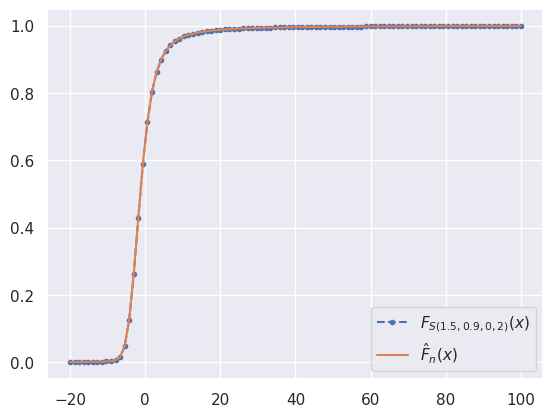

In [263]:
xs = np.linspace(-20,100,100)
Fx = ecdf(xs)
# plt.plot(xs, levy_stable.cdf(xs, alpha, beta, delta, gamma), ".--", label = f"CDF S({alpha}, {beta}, {gamma}, {delta})")
plt.plot(xs, levy_stable.cdf(xs, alpha, beta, delta, gamma), ".--", label = "$F_{S(%a, %a, %a, %a)}(x)$"%(alpha, beta, delta, gamma))

plt.plot(xs, ecdf(xs), label = "$\\hat F_n(x)$")
plt.legend()
plt.show()

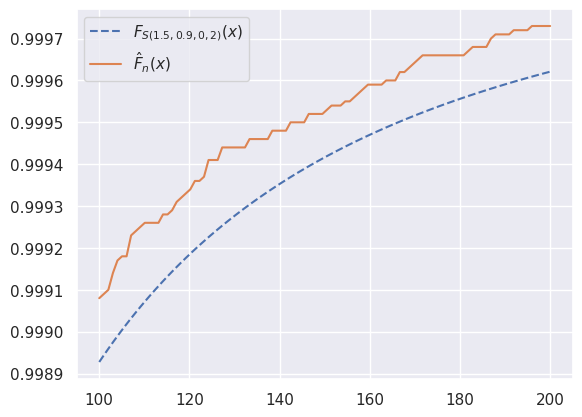

In [265]:
xs = np.linspace(100,200,100)
Fx = ecdf(xs)
# plt.plot(xs, levy_stable.cdf(xs, alpha, beta, delta, gamma), ".--", label = f"CDF S({alpha}, {beta}, {gamma}, {delta})")
plt.plot(xs, levy_stable.cdf(xs, alpha, beta, delta, gamma), "--", label = "$F_{S(%a, %a, %a, %a)}(x)$"%(alpha, beta, delta, gamma))

plt.plot(xs, Fx, label = "$\\hat F_n(x)$")
plt.legend()
plt.show()

In [266]:
# plt.plot(np.log(xs), np.log(1-Fx), "*--", label = "$\\ln(1- \\hat{F}(x))$")
# a, b  =np.polyfit(np.log(xs), np.log(1-Fx), 1)
# plt.plot(np.log(xs), a*np.log(xs) + b,".--", label = f"${a}*xs+{b}$", alpha = 0.4)
# c_a = np.sin(pi*alpha/2)*scipy.special.gamma(alpha)/pi
# # ys = gamma**alpha*c_a*(1+beta)*(gamma*xs+delta+beta*gamma*np.tan(pi*alpha/2))**(-alpha)
# ys = gamma**alpha*c_a*(1+beta)*(xs)**(-alpha)

# plt.plot(np.log(xs), np.log(ys) ,"*--", label = f"teoretic", alpha = 0.4)

# plt.legend()
# plt.show()

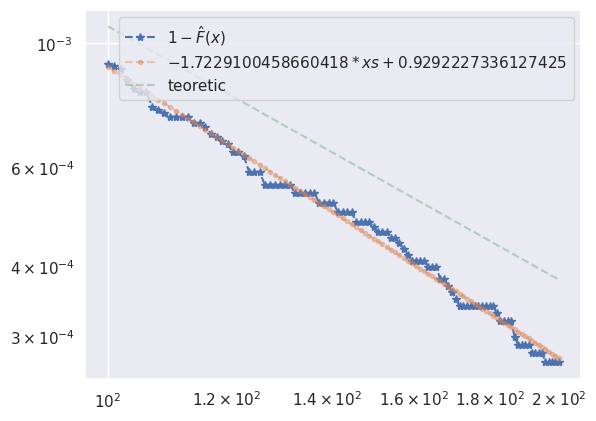

In [267]:
a, b  =np.polyfit(np.log(xs), np.log(1-Fx), 1)
c_a = np.sin(pi*alpha/2)*scipy.special.gamma(alpha)/pi
ys = gamma**alpha*c_a*(1+beta)*(gamma*xs+delta+beta*gamma*np.tan(pi*alpha/2))**(-alpha)
ys = gamma**alpha*c_a*(1+beta)*(xs)**(-alpha)

plt.plot(xs, 1-Fx, "*--", label = "$1- \\hat{F}(x)$")

plt.plot(xs, np.exp(a*np.log(xs) + b),".--", label = f"${a}*xs+{b}$", alpha = 0.4)

plt.plot(xs, ys ,"--", label = f"teoretic", alpha = 0.4)

plt.xscale("log")
plt.yscale("log")

plt.legend()
plt.show()

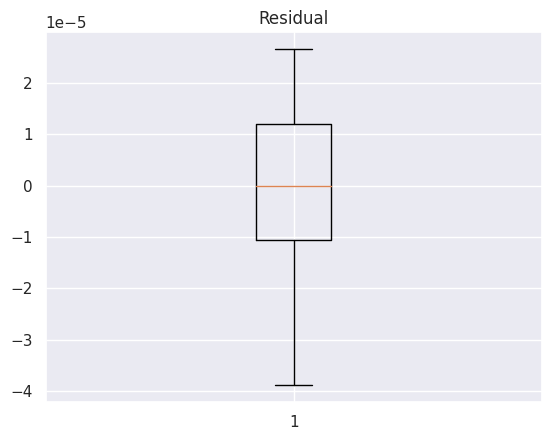

In [272]:
plt.title("Residual")
err =1-Fx - np.exp(a*np.log(xs) + b)
plt.boxplot( err )
plt.show()

In [273]:
yt = 1-Fx
R2 = 1 - np.sum(err**2)/np.sum((yt - np.mean(yt))**2)
R2

0.9921088446518701

In [274]:
import pandas as pd
pd.DataFrame(1-Fx - np.exp(a*np.log(xs) + b) ).describe().T

,count,mean,std,min,25%,50%,75%,max
0,100.0,-1.127329e-07,0.000016,-0.000039,-0.000011,1.107691e-08,0.000012,0.000027
